# making html pages to view coadds and cutouts


## TO DO

* look for images - if they exist, you don't have to remake them
* figure out how to incorporate the photzp image surfaces - they are stored with raw data
* start building one page per cutout

In [28]:
import os
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [134]:
os.chdir('/home/rfinn/research/Virgo/html-dev/')

Found /home/rfinn/research/Virgo/html-dev/coadds/VF-219.9485+5.3942-INT-20190530-p019/r-coadd.png.  not remaking this.
Found /home/rfinn/research/Virgo/html-dev/coadds/VF-219.9485+5.3942-INT-20190530-p019/ha-coadd.png.  not remaking this.


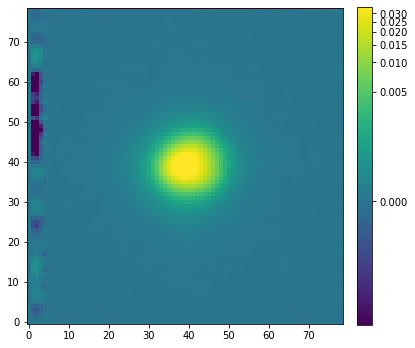

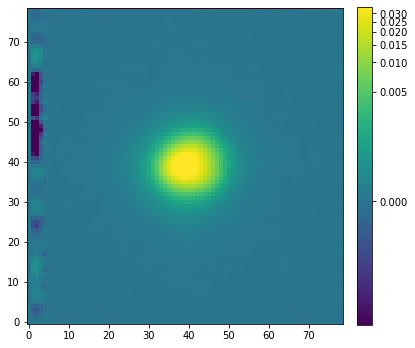

In [157]:
%run ~/github/Virgo/programs/build_web_coadds.py

In [133]:
h = build_html_pointing(p)

In [131]:
h.write_header()

ValueError: I/O operation on closed file.

In [121]:
p.get_params_for_gal_table()

In [ ]:
h.write_gal_table()

In [122]:
h.write_rband_div()

In [123]:
h.write_rband_table()

In [124]:
h.write_ha_div()

In [125]:
h.write_ha_table()

In [126]:
h.write_footer()

In [127]:
h.close_html()

In [130]:
p.r.imheader['TELESCOPE']

KeyError: "Keyword 'TELESCOPE' not found."

In [38]:
def display_image(image,percent=99.5,lowrange=False,mask=None,sigclip=False):
    lowrange=False
    # use inner 80% of image
    xdim,ydim = image.shape
    xmin = int(.2*xdim)
    xmax = int(.8*xdim)    
    ymin = int(.2*ydim)
    ymax = int(.8*ydim)    
    if sigclip:
        clipped_data = sigma_clip(image[xmin:xmax,ymin:ymax],sigma_lower=5,sigma_upper=5)#,grow=10)
    else:
        clipped_data = image[xmin:xmax,ymin:ymax]
    if lowrange:
        norm = simple_norm(clipped_data, stretch='linear',percent=percent)
    else:
        norm = simple_norm(clipped_data, stretch='asinh',percent=percent)

    plt.imshow(image, norm=norm,cmap='gray_r',origin='lower')
    

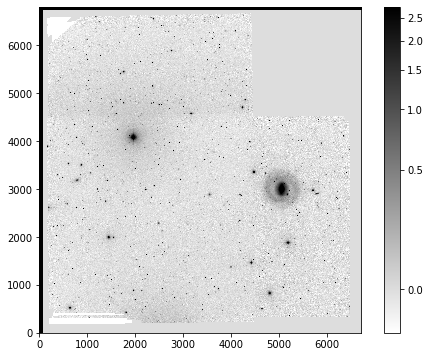

In [40]:
plt.figure(figsize=(8,6))
display_image(p.r.imdata,percent=99.5,sigclip=False,lowrange=False)
plt.colorbar()

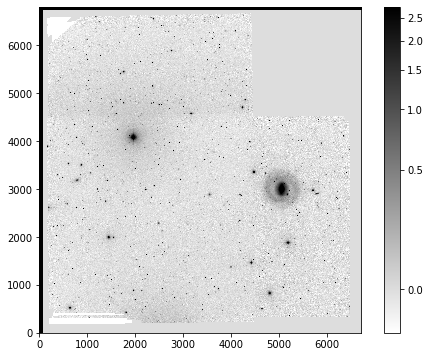

In [41]:
plt.figure(figsize=(8,6))
display_image(p.r.imdata,percent=99.5,sigclip=False,lowrange=True)
plt.colorbar()

In [44]:
!ls


r-coadd.png


# Cutouts

* creating png images

In [213]:
os.chdir('/home/rfinn/research/Virgo/html-dev/')

In [227]:
%run ~/github/Virgo/programs/build_web_cutouts.py

<Figure size 432x288 with 0 Axes>

/home/rfinn/research/Virgo/gui-output-2019-june/cutouts/VFID0481-NGC6307/*-R.fits
['/home/rfinn/research/Virgo/gui-output-2019-june/cutouts/VFID0481-NGC6307/VFID0481-NGC6307-v19p010-R.fits']


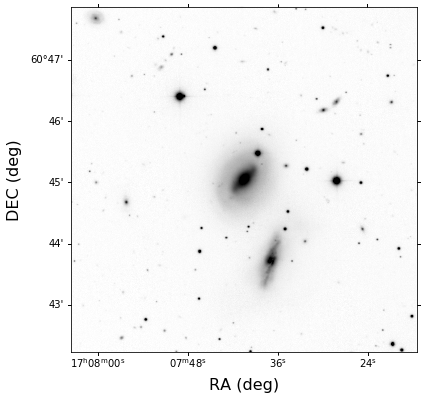

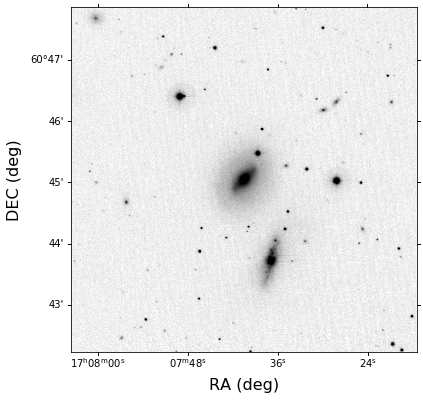

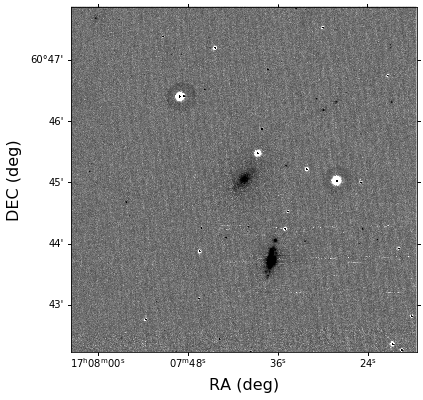

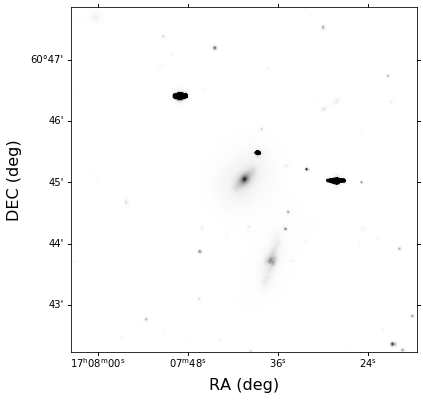

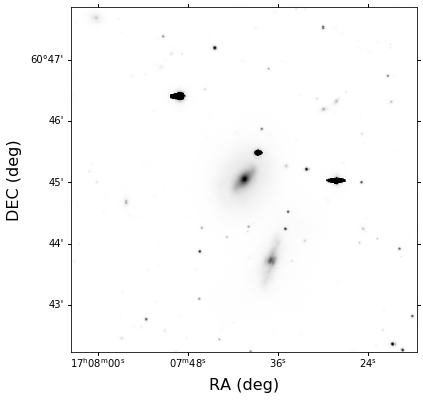

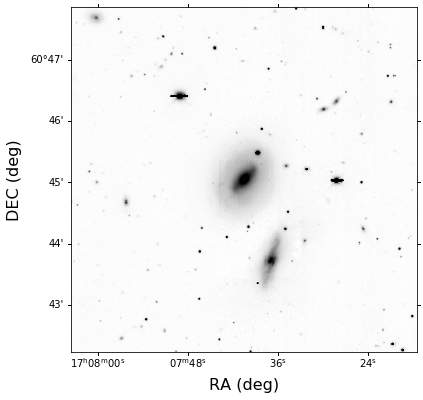

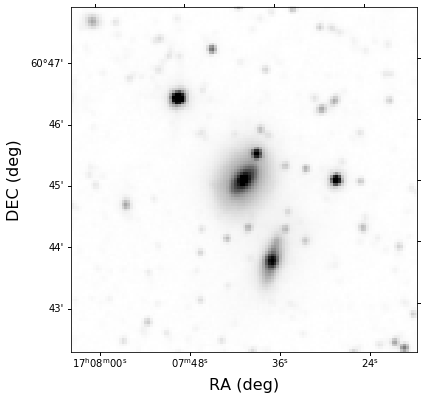

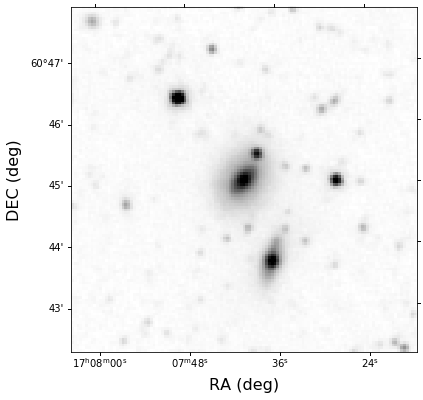

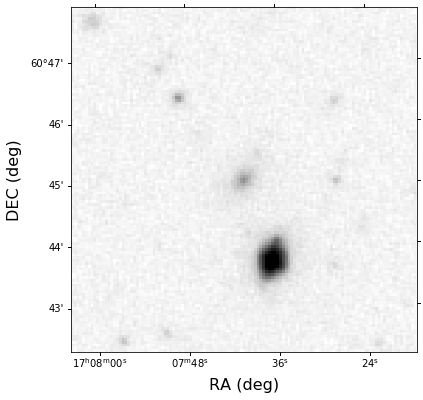

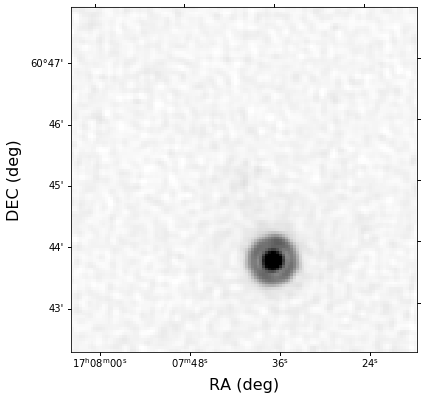

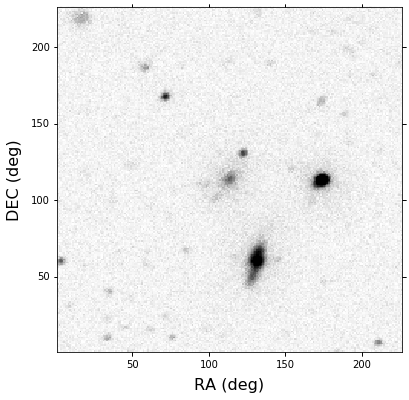

In [228]:
p.runall()

In [219]:
mask = fits.getdata(p.maskimage)

In [229]:
p.make_png_cs()

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 1 dimension(s)

In [200]:
data = fits.getdata(p.csimage)

In [253]:
def display_image(image,percent=99.5,lowrange=False,mask=None,sigclip=True):
    lowrange=False
    # use inner 80% of image
    xdim,ydim = image.shape
    xmin = int(.1*xdim)
    xmax = int(.9*xdim)    
    ymin = int(.1*ydim)
    ymax = int(.9*ydim)
    if mask is not None:
        mask = mask[xmin:xmax,ymin:ymax]
    
    if sigclip:
        clipped_data = sigma_clip(image[xmin:xmax,ymin:ymax],sigma_lower=1.5,sigma_upper=1.5)#,grow=3)
    else:
        clipped_data = image[xmin:xmax,ymin:ymax]
    if mask is not None:
            clipped_data = np.ma.array(clipped_data,mask=mask)
    if lowrange:
        norm = simple_norm(clipped_data, stretch='linear',percent=percent)
    else:
        norm = simple_norm(clipped_data, stretch='asinh',percent=percent)


    plt.imshow(image, norm=norm,cmap='gray_r',origin='lower')
 

In [254]:
imdata = fits.getdata(p.csimage)

In [246]:
maskdata = fits.getdata(p.maskimage)
boolmask = maskdata > 0

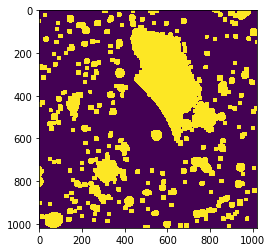

In [261]:
plt.imshow(boolmask)

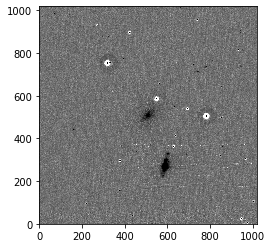

In [258]:
plt.figure()

display_image(imdata,mask=boolmask,sigclip=True,percent=99.5,lowrange=False)

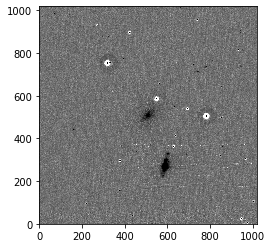

In [259]:
display_image(imdata)